## NumPy Exercise Book

#### Introduction

In scikit-learn (sklearn) we will usually do the calculations with numerical arrays. As the built-in Python list is not suitable to serve as numeric array, sklearn utilizes NumPy arrays. The designers of NumPy took great care in making NumPy arrays in a "pythonic" way.

NumPy arrays are more efficient than regular python lists because they are homogeneous: all elements are of the same type. As a consequence memory size only depends on the number of elements. This makes calculations much more efficient.

In this exercise we will only focus on the array handling functionality of NumPy as this is what we will mostly use from NumPy when using sklearn. Under the hood, sklearn will use a lot more of NumPy's functionality, but we will stay away from the linear algebra jungle sklearn is built upon.  
Please note these exercises only represent a tiny part of NumPy's functionality. What's more, these exercises only touch a small part of NumPy's array handling functionality. It's only meant to get you going in exploring NumPy's extensive array handling capabilities.

Having finished this exercise book and want to know some more (I'm sure you will!): Robert Johansson created a nice introductory NumPy [notebook](https://goo.gl/zfsx77). 

#### Creating NumPy arrays

In [54]:
import numpy as np
# Numpy arrays are created from  python lists and tuples using the array function
print(np.array([1,2,3]))   # from a list (note square brackets)
print(np.array((1,2,3)))   # from a tuple (note parenthesis)

[1 2 3]
[1 2 3]


In [55]:
# create an array for the string 'aacta' with lookup list ['a','c','t']
# you should get array([0, 0, 1, 2, 0]) which is a simple numeric encoding of the string
np.array([i for c in 'aacta' for i,ch in enumerate(['a','c','t']) if ch == c])

array([0, 0, 1, 2, 0])

I did the above by using the enumerate. How does this work? The ``enumerate(iterable, start=0)`` function return a so-called enumerate object. Iterable must be a sequence, an iterator, or some other object which supports iteration. The built-in ``__next__()`` method of the iterator returned by enumerate() returns a tuple containing a count (from start which defaults to 0) and the values obtained from iterating over iterable. Look at the following code snippet for an example! 

In [56]:
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
print(list(enumerate(seasons)))
print(list(enumerate(seasons, start=1)))

[(0, 'Spring'), (1, 'Summer'), (2, 'Fall'), (3, 'Winter')]
[(1, 'Spring'), (2, 'Summer'), (3, 'Fall'), (4, 'Winter')]


In [57]:
# Now let's encode the string  "fontys" in such a way that each character is encoded with the reverse number of the 
# alphabet: a=26, z=1; you should get:
# array([20, 11, 12,  6,  1,  7])
from string import ascii_lowercase
np.array([i for c in 'fontys' for i,ch in enumerate(ascii_lowercase[::-1]) if ch == c])

array([20, 11, 12,  6,  1,  7])

In [5]:
# That was a nice recap of last weeks's exercises
# Usually we will work with arrays of floats and we can pass the data type upon creation:
np.array([1,2,3], dtype = float)

# Or just np.array([1,2,3], float) 

array([ 1.,  2.,  3.])

In [6]:
# In sklearn we will often work with multi-dimensional arrays (matrices); create the array ([1,2,3],[3,2,1])
np.array([[1,2,3],[3,2,1]])

array([[1, 2, 3],
       [3, 2, 1]])

In [7]:
# What happens if the rows are not of equal size; 
np.array([[1,2,3],[2,1]])

# You 'll get a 1 dimensional array of objects!

array([[1, 2, 3], [2, 1]], dtype=object)

In [58]:
# You just created a  2 x 3 array. How can you create the mirrored 2 x 3 array of the original data?
# Use np.transpose
np.transpose([[1,2,3],[3,2,1]])

array([[1, 3],
       [2, 2],
       [3, 1]])

In [59]:
# or even easier: use the .T attribute
np.array([[1,2,3],[3,2,1]]).T

array([[1, 3],
       [2, 2],
       [3, 1]])

In [10]:
# Each array has a number of properties
# We will often use shape, ndim (number of dimensions) and size (number of elements) properties
# get shape, ndim and size of the array below
M = np.array([[1,2,3],[3,2,1]])
print(M.shape, M.ndim, M.size)

((2, 3), 2, 6)


In [11]:
# The number of dimensions is equal to the number of elements in the shape vector.
# The array size is equal to the product of the shape elements
# Proof both:
sz = 1
for i in range(len(M.shape)):
    sz *= M.shape[i]
M.size == sz and len(M.shape) == M.ndim

True

In [12]:
# Although a.size is only a short tuple, it is common to write for loops as above with a reduce (it's the same reduce 
# from the map/reduce algorithm)
# Import the reduce from itertools and combine with a lambda to rewrite above for loop
from functools import reduce
reduce(lambda x, y: x * y, M.shape)

6

In [13]:
# Want to know what other goodies are stuffed in the functools module? (first you have to import the complete module)
import functools
print(dir(functools))

['WRAPPER_ASSIGNMENTS', 'WRAPPER_UPDATES', '__builtins__', '__doc__', '__file__', '__name__', '__package__', 'cmp_to_key', 'partial', 'reduce', 'total_ordering', 'update_wrapper', 'wraps']


In [14]:
# Want to know specifically about reduce():
help(functools.reduce)

Help on built-in function reduce in module _functools:

reduce(...)
    reduce(function, sequence[, initial]) -> value
    
    Apply a function of two arguments cumulatively to the items of a sequence,
    from left to right, so as to reduce the sequence to a single value.
    For example, reduce(lambda x, y: x+y, [1, 2, 3, 4, 5]) calculates
    ((((1+2)+3)+4)+5).  If initial is present, it is placed before the items
    of the sequence in the calculation, and serves as a default when the
    sequence is empty.



In [15]:
# You can also use the magic command ? Now help is directed to a separate window, called the pager
# Btw, we can use reduce without the functools qualifier as we've imported it directly into our namespace
?reduce

In [60]:
# You can avoid the lambda by using straight operator reduction
# Import the mul (multiply) operator from the operator module
from operator import mul
reduce(mul, M.shape) == M.size and len(M.shape) == M.ndim
reduce(mul,M.shape)

12

In [17]:
# use #timeit to compare performance of lambda versus operator.mul
%timeit reduce(lambda x, y: x * y, M.shape)
%timeit reduce(mul, M.shape)

The slowest run took 18.83 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 481 ns per loop
The slowest run took 8.90 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 348 ns per loop


#### Automatic Array Creation

In [18]:
# Use np.zeros to create an array of 0's
np.zeros(6)

array([ 0.,  0.,  0.,  0.,  0.,  0.])

In [19]:
# You can morph to a required shape in the same constructor:
np.zeros((3,2))    # parenthesis are required as zeros() can have more params. See ?np.zeros

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [20]:
# Use np.ones to create an array of 1's
np.ones(5)

array([ 1.,  1.,  1.,  1.,  1.])

In [21]:
# np.arange can be used to create an array from a range
# create array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) using arange()
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [22]:
# With arange() you can use the same parameters as with range():
np.arange(0, 1, 0.1)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])

In [23]:
# Use np.linspace tocreate arrays with a specified number of elements, spaced equally between specified beginning and 
# end values
# Create array([1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ])
np.linspace(1., 2., 11)

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ])

In [24]:
# You can use logscale() to generate evenly spaced numbers on a log scale; see ?np.logspace
from math import e
np.logspace(0, 2, 10, base=e)

array([ 1.        ,  1.24884887,  1.5596235 ,  1.94773404,  2.43242545,
        3.03773178,  3.79366789,  4.73771786,  5.91669359,  7.3890561 ])

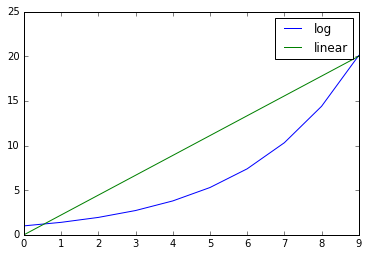

In [25]:
# Try to plot np.linspace(0., 20., 10) and  np.logspace(0, 3, 10, base=e) in a plot using matplotlib
# New? Didn't you already learn this in visualization ...
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(10), np.logspace(0, 3, 10, base=e), label='log')
plt.plot(range(10), np.linspace(0, 20, 10), label='linear')
plt.legend(loc='best')
plt.show()

In [26]:
e**-100

3.7200759760208555e-44

In [61]:
# For test data in sklearn, we wil often use randomly created data
# Create a 2x3 array of random data between 0 and 1
np.random.random((2,3))

array([[ 0.1610284 ,  0.56051183,  0.39238076],
       [ 0.02338202,  0.38902869,  0.81961226]])

In [62]:
# There are many ways to draw random numbers.
# Draw 24 random numbers from a normalized distribution with mean 6.75 and stddev 2
# This could be used to simulate class grades ...
np.random.normal(6.75,2,24)

array([  6.66567918,   3.60014947,   4.61334653,   4.56144961,
         5.52244844,   5.1870915 ,   9.58789924,   4.801378  ,
        10.84680713,   7.33148849,   8.38705366,   7.50200315,
         6.79195347,   8.25524946,   5.71556989,   6.80743512,
         5.38034995,   5.72338018,   7.73121383,   6.21252132,
         3.93937021,   9.75852457,   5.8932957 ,   7.95331086])

#### Importing data from CSV files
Often, extracting and cleaning data is executed in a separate process. It is the process you learn all about in the Getting and Cleaning Data course. Often, the result of this process is a CSV file, that can be used for further analysis with, for instance pandas or sklearn. Numpy has dedicated facilities to read data from a CSV file into an array.

In [65]:
# read the contents of data.csv into a NumPy('data.csv', delimiter=';')
np.genfromtxt('data.csv', delimiter=';')

array([[             nan,              nan,              nan],
       [  2.01000000e+03,   4.30000000e+01,   1.50000000e+01],
       [  2.01100000e+03,   4.10000000e+01,   7.00000000e+00],
       [  2.01200000e+03,   3.70000000e+01,   9.00000000e+00],
       [  2.01300000e+03,   2.10000000e+01,   1.00000000e+00],
       [  2.01400000e+03,   1.50000000e+01,   9.00000000e+00],
       [  2.01500000e+03,   1.00000000e+01,   7.00000000e+00]])

In [69]:
# The header row is convenient when using labeled columns in pandas, but here we want to ignore it.
# Remove the header row and show only the first two rows


#### Indexing, Slicing and Masking

In [31]:
# Get the first row from matrix M: array([[ 0,  1,  2,  3], [ 4,  5,  6,  7], [ 8,  9, 10, 11]])
M = np.arange(12).reshape(3,4)
print(M)
M[0]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


array([0, 1, 2, 3])

In [70]:
# Get the second column from M
M[:,[1]]

array([[1],
       [5],
       [9]])

In [33]:
# We already used the reshape method to change an array's shape
# You can also do this using an np.newaxis object in a slice tuple:
a = np.arange(12)
a.reshape(12,1).shape == a[:,np.newaxis].shape

True

In [34]:
# You can use a boolean expression on an array to mask elements from that array
a = np.arange(10)
a[a % 2 == 0]

array([0, 2, 4, 6, 8])

In [72]:
# Divide all even numbers in an array by 2
a = np.arange(10)

for aa in a:
    if (aa%2==0):
        print(aa//2)
        
(a[a%2==0])//2        
# Use integer division (//) if you want to maintain the integer data type:


0
1
2
3
4


array([0, 1, 2, 3, 4])

In [36]:
# Divide all elements from the second column of a 2x3 matrix by 2
a = np.ones(6).reshape(2,3)
a[:,1] /= 2
a

array([[ 1. ,  0.5,  1. ],
       [ 1. ,  0.5,  1. ]])

In [73]:
# Strip the last value from each row in a 2-dim array (for instance a calculated row total)
a = np.array([[1,2,3],[4,5,9],[5,6,11]])
# now strip the last value from each row
a[:,:2]

array([[1, 2],
       [4, 5],
       [5, 6]])

There are a lot of indexing and slicing techniques in NumPy that can save you of lot of programming in preparing your data for any machine learning algorithm. Consult the [chapter on indexing in the NumPy tutorial](http://docs.scipy.org/doc/numpy/user/basics.indexing.html) to get a fairly complete list of various techniques.

#### Simple Array Operations

In [38]:
# Given a = array(1,2,3) and b = array(3,3,3), verify that a+b is equal to a+3
a = np.arange(1,4)
print(a)
b = np.array([3] * 3)
print(b)
print(a + b)
print(a + 3)
a + b == a + 3

[1 2 3]
[3 3 3]
[4 5 6]
[4 5 6]


array([ True,  True,  True], dtype=bool)

In [39]:
# or:
np.all(a + b == a + 3)

True

In [40]:
# Get the number of elements larger than 1 from array a
print(a[a > 1].size)
# a bit slower:
print(len(a[a > 1]))
# much slower (test with %timeit):
print(sum(a > 1))

2
2
2


In [74]:
# Considering the result of previous question, how would you count the nr of elements > 5 in a*b
ab=a*b
ab[ab>5].size

8

In [76]:
# And how would you count the number of elements in b that are larger than their counterpart in a
b[b>a].size

IndexError: too many indices for array

In [43]:
# Transpose  3 by 2 array((1,2,3), (4,5,6) to 2 by 3 array((1,4), (2,5), (3,6))
# In numpy we have a proper transpose function
np.transpose(np.arange(1,7).reshape(2,3))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [44]:
# or, using the T attribute:


In [45]:
# note this is not the same as:
np.arange(1,7).reshape(2,3).reshape(3,2)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [46]:
# Typical sklearn problem: 
# Change [['M', 'S', 'B'], ['geel', 'rood', 'rood']] to array((1,3,4,2), (4,2,3,3)), where the values of both lists 
# are looked up in lists ['B', 'M', 'S', 'T']  and ['blauw', 'geel', 'groen', 'oranje', 'rood']
# so, your result should be:
# array([[1, 2, 0],
#       [1, 4, 4]])
l1 = ['M', 'S', 'B']
l2 = ['geel', 'rood', 'rood']
lu1 = ['B', 'M', 'S', 'T']
lu2 = ['blauw', 'geel', 'groen', 'oranje', 'rood']


In [77]:
# Count the number of fails in the randomly generated exam marks above
a = np.random.normal(6.5, 1. , 20)
print(a)
# now create the count expression
a[a<6].size

[ 6.15449165  6.52330193  7.07002437  6.58547867  6.19199244  4.87292581
  6.47727502  5.27803918  6.15061082  6.5426439   7.02057433  5.55288687
  5.26376828  6.69788041  6.42729147  6.81218893  5.34049581  5.66524207
  6.76583019  5.74852268]


7

In [48]:
# Add column array(3,5) to array((1, 2), (3, 4)) to form array((1, 2, 3), (3, 4, 5))
# Use np.append, read carefully and think hard
# Try some variations yourself
a = np.arange(1,5).reshape(2,2)
np.append(a, [[3],[5]], axis=1)

array([[1, 2, 3],
       [3, 4, 5]])

In [49]:
# A more generic solution for adding a column of zeroes to any matrix would be:
nrRows = 3
a = np.arange(1,10).reshape(nrRows, nrRows)
# Using list comprehension to morph the column to add in its required form
np.append(a, [[n] for n in [0]*nrRows], axis = 1)
# Or using np.zeros (careful with the parameters: first param is a tuple)
np.append(a, np.zeros((nrRows,1)), axis=1)

array([[ 1.,  2.,  3.,  0.],
       [ 4.,  5.,  6.,  0.],
       [ 7.,  8.,  9.,  0.]])

In [50]:
# or (study carefully):
a = np.arange(1,10).reshape(3, 3)
np.append(a.T, np.zeros((1,3)), axis=0).T

array([[ 1.,  2.,  3.,  0.],
       [ 4.,  5.,  6.,  0.],
       [ 7.,  8.,  9.,  0.]])

#### Vectorization

We already saw some examples of vectorization: `a % 2` and `a + 3` are simple examples of NumPy's vectorization capabilities. The operator and the non-array operand are applied to all elements in the array.
You can also vectorize your own functions over an array using `np.vectorize()`

In [51]:
a1 = np.arange(0, 5)
a2 = np.arange(5, 0, -1)
print(a1, a2)
a1[4::-1]

(array([0, 1, 2, 3, 4]), array([5, 4, 3, 2, 1]))


array([4, 3, 2, 1, 0])

You can also apply this principle of vectorization to your functions. That is, you can vectorize you function over your NumPy array using np.vectorize

In [52]:
def foo(x):
    return x%2 == 0 and x%3 == 0

a = np.arange(100)
a[np.vectorize(foo)(a)]

array([ 0,  6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72, 78, 84, 90, 96])

Look carefully at the previous construction: ``np.vectorize()`` returns a new function that is immediately called with the parameter a. This should look familiar to those of you having worked with JavaScript where you often apply a function immediately at definition. By using a lambda, you can also use an anonymous function for vectorization.

In [53]:
# create the same list using vectorization with a lambda
a[np.vectorize(lambda x: x%2 == 0 and x%3 == 0)(a)]

array([ 0,  6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72, 78, 84, 90, 96])